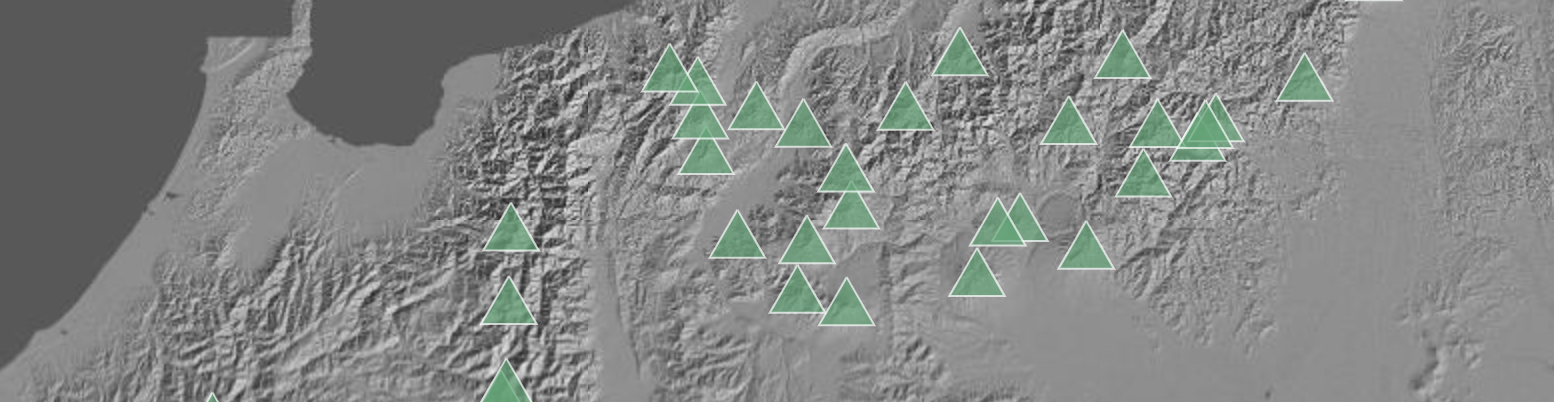

In [ ]:
# !pip install lets-plot --quiet

import lets_plot
lets_plot.__version__

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

from lets_plot import *
from lets_plot import tilesets
LetsPlot.setup_html()
LetsPlot.set(tilesets.NASA_GREYSCALE_SHADED_RELIEF_30M)

## Volcanoes Coordinates

Volcano coordinates are given in DMS format and should be converted to decimal degrees for plotting on a map.

In [ ]:
df_volc = pd.read_csv("Data/Japan_Volcano.csv", encoding ='utf-8')
df_volc.head(3)

In [ ]:
def dms_to_decimal(dms_string):
    """
    Convert DMS coordinates to decimal degrees.
    
    >>> dms_to_decimal("99.539°E")
    99.539
    
    >>> dms_to_decimal("99.539°W")
    -99.539
    
    """
    degrees, direction = dms_string.split('°')
    degrees = float(degrees)
    
    # Adjusting the sign based on direction
    if direction in ['S', 'W']:
        degrees *= -1
    
    return degrees


In [ ]:
df_volc = df_volc.dropna(subset=['Coordinates'])

# Split 'Coordinates' DMS str.
lat_lon_dms = df_volc.Coordinates.str.split(' ').apply(lambda lst: lst[1:3])

# Remove BOM symbols (\ufeff) and
# convert DMS strings to decimal degrees.
lat_lon_dd = lat_lon_dms.apply(lambda lst: [dms_to_decimal(v.replace('\ufeff', '')) for v in lst])

# Create a GeoDataframe by adding the 'geometry' column.
latitudes = lat_lon_dd.apply(lambda pair: pair[0])
longitudes = lat_lon_dd.apply(lambda pair: pair[1])

gdf_volc = gpd.GeoDataFrame(df_volc, geometry=gpd.points_from_xy(longitudes, latitudes))
gdf_volc.head(3)

## Volcanoes on Map

In [ ]:
nice_view_options = dict(
    location = [129.450953, 30.151413, 144.875758, 42.515155],
    zoom = 6
)

In [ ]:
(ggplot() + geom_livemap(**nice_view_options, const_size_zoomin=2) + 
 geom_point(data=gdf_volc, 
            tooltips=layer_tooltips(["Region", "Last_eruption"])
                .title("@Name") 
                .line("Elevation | @Elevation_meters(m)/@Elevation_ft(ft)"), 
            fill='#75DFBD', color='white', shape=24, size=8, alpha=.7) + 
 ggsize(1000, 1000)
)

## Volcanoes Heatmap

In [ ]:
coords_data = dict(
    lon=longitudes,
    lat=latitudes
)

(ggplot(coords_data) + geom_livemap() + 
 # Volcano locations
 geom_point(data=gdf_volc, 
            tooltips=layer_tooltips(["Region", "Last_eruption"])
                .title("@Name") 
                .line("Elevation | @Elevation_meters(m)/@Elevation_ft(ft)"), 
            color='white', size=2) + 
 
 # Heatmap by Hex stat.
 geom_hex(aes("lon", "lat"), bins=[10, 15], alpha=.6, tooltips='none') +
 
 scale_fill_viridis(option='magma', guide=guide_colorbar(barwidth=4, barheight=300)) +
 flavor_high_contrast_dark() +
 theme(plot_background=element_rect(fill='#585858')) +
 theme(legend_position=[1, 0.5], legend_justification=[1, 0.5], legend_background=element_rect(fill='#585858'),
       plot_inset=0) +
 ggsize(1000, 1000)
) 

## Heatmap and Contours of a 2D Density

In [ ]:
(ggplot(coords_data) + geom_livemap() + 
 # Volcano locations
 geom_point(data=gdf_volc, 
            tooltips=layer_tooltips(["Region", "Last_eruption"])
                .title("@Name") 
                .line("Elevation | @Elevation_meters(m)/@Elevation_ft(ft)"), 
            color='white', size=2) + 
 
 # Heatmap by Count-2D stat.
 geom_bin2d(aes("lon", "lat"), bins=[10, 15], alpha=.6, tooltips='none') +
 scale_fill_viridis(option='magma', guide=guide_colorbar(barwidth=4, barheight=300)) +
 
 # Contours by Density-2D stat.
 geom_density2d(aes("lon", "lat", color='..level..'), size=0.4, alpha=.6, tooltips='none', show_legend=False) +
 scale_color_viridis(option='turbo') +
  
 flavor_high_contrast_dark() +
 theme(plot_background=element_rect(fill='#585858')) +
 theme(legend_position=[1, 0.5], legend_justification=[1, 0.5], legend_background=element_rect(fill='#585858'),
       plot_inset=0) +
 ggsize(1000, 1000)
) 

## Filled Contour Bands

In [ ]:
(ggplot(coords_data) + geom_livemap() + 
 # Volcano locations
 geom_point(data=gdf_volc, 
            tooltips=layer_tooltips(["Region", "Last_eruption"])
                .title("@Name") 
                .line("Elevation | @Elevation_meters(m)/@Elevation_ft(ft)"), 
            color='white', size=2) + 
 
 # Contours by Density-2D Filled stat.
 geom_density2df(aes("lon", "lat", fill='..level..'), alpha=.6, tooltips='none', show_legend=False) +
 scale_fill_viridis(option='magma') +
  
 flavor_high_contrast_dark() +
 theme(plot_background=element_rect(fill='#585858'),
       plot_inset=0) +
 ggsize(1000, 1000)
) 